In [ ]:
## Loading the data and grouping according to hierarchical clusters

In [33]:
import pandas as pd
import numpy as np
import math


dist=pd.read_csv('../Runs_on_cluster/run2/arrays_in_whole_dataset_v6_noneg_pairwiseDist.csv',sep='\t',index_col=0)

# pop_vals= pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/prep_for_Arlequin/arrays_with_at_least_5percent_in_reads.popcounts',sep='\t',header=0,index_col=0)
# pop_vals=pop_vals.T
# pop_vals.dtypes

pop_vals= pd.read_csv('ALLCRISPRs_haplo_matches_at_5_dist_V6_sorted.txt',sep=',',header=0,index_col=0)
pop_vals=pop_vals.T.drop('seq.id',axis=0).iloc[:,:dist.shape[0]]
pop_vals[pop_vals.isna()] = 0
pop_vals = pop_vals.astype(float)

In [34]:
meta1=pd.read_csv('metadata_env.txt',sep='\t',header=0)
meta1

meta2=pd.read_csv('CRISPR_metadata.txt',sep='\t',header=0)
meta2

meta3=pd.merge(meta1,meta2,how='inner',on='Site')
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6368.5 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return(d)
# print(meta3.lat)
meta3.lat = [sum([int(val.split(' ')[0][:-1]),float(val.split(' ')[1])/60]) for val in meta3.lat.values]
meta3.long = [-sum([int(val.split(' ')[0][:-1]),float(val.split(' ')[1])/60]) for val in meta3.long.values]
meta3.Sample = [string[4:] for string in meta3.Sample.values]
meta3

,Site,lat,long,Depth,Temp_plume,Temp_base,seqid,Sample,Sample_id,Ind,Region,Flow,dupl
0,R07B,47.949992,-129.097070,2195,2.8,2.8,PBBC13,R07B-1-Ta,C13,R07B-1,MEF,B,s
1,R07B,47.949992,-129.097070,2195,2.8,2.8,PBBC14,R07B-1-Tb,C14,R07B-1,MEF,B,s
2,R07B,47.949992,-129.097070,2195,2.8,2.8,PBBC15,R07B-1-Tc,C15,R07B-1,MEF,B,s
3,R07B,47.949992,-129.097070,2195,2.8,2.8,PBBC16,R07B-1-Td,C16,R07B-1,MEF,B,s
4,R07B,47.949992,-129.097070,2195,2.8,2.8,PBBC47,R07B-2-Tb,C18,R07B-2,MEF,B,s
5,R07B,47.949992,-129.097070,2195,2.8,2.8,PBBC19,R07B-2-Tc,C19,R07B-2,MEF,B,s
6,R07B,47.949992,-129.097070,2195,2.8,2.8,PBBC21,R07B-3-T,C21,R07B-3,MEF,B,n
7,R14B,47.963057,-129.091665,2180,2.5,3.9,PBBC01,R14B-2-T,C01,R14B-2,CB,B,n
8,R14B,47.963057,-129.091665,2180,2.5,3.9,PBBC03,R14B-4-T,C03,R14B-4,CB,B,n
9,R02H,47.949333,-129.098642,2195,NaN,NaN,PBBC38,R02H-7-T,C39,R02H-7,MEF,H,n


In [36]:
# print(meta3)
# pop_vals=pop_vals/pop_vals.sum(axis=1).to_numpy().reshape(-1,1)
pop_vals['Sample']=pop_vals.index

pop_vals=pop_vals.sort_index()
pop_vals
# pop_vals.sum(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,Sample
R01L-10-T,0.0,0.0,205.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R01L-10-T
R01L-12-T,0.0,0.0,35.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R01L-12-T
R02H-7-T,1.0,0.0,227.0,0.0,2.0,0.0,0.0,1.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R02H-7-T
R02H-8-T,0.0,0.0,83.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R02H-8-T
R02H-8-T_bis,0.0,0.0,139.0,0.0,21.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R02H-8-T_bis
R02H-9-T,0.0,0.0,51.0,0.0,1.0,0.0,0.0,2.0,61.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R02H-9-T
R07B-1-Ta,0.0,0.0,106.0,0.0,0.0,0.0,0.0,66.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R07B-1-Ta
R07B-1-Tb,0.0,0.0,158.0,0.0,0.0,0.0,0.0,80.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R07B-1-Tb
R07B-1-Tc,0.0,0.0,302.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R07B-1-Tc
R07B-1-Td,0.0,0.0,210.0,0.0,0.0,0.0,28.0,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R07B-1-Td


In [37]:
df=pd.merge(pop_vals,meta3,how='left',on='Sample')
df

,0,1,2,3,4,5,6,7,8,9,...,long,Depth,Temp_plume,Temp_base,seqid,Sample_id,Ind,Region,Flow,dupl
0,0.0,0.0,205.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-129.098642,2190,NaN,NaN,PBBC36,C36,R01L-10,MEF,L,n
1,0.0,0.0,35.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,...,-129.098642,2190,NaN,NaN,PBBC37,C37,R01L-12,MEF,L,n
2,1.0,0.0,227.0,0.0,2.0,0.0,0.0,1.0,2.0,5.0,...,-129.098642,2195,NaN,NaN,PBBC38,C39,R02H-7,MEF,H,n
3,0.0,0.0,83.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-129.098642,2195,NaN,NaN,PBBC39,C40,R02H-8,MEF,H,y
4,0.0,0.0,139.0,0.0,21.0,0.0,0.0,4.0,0.0,0.0,...,-129.098642,2195,NaN,NaN,PBBC18,C40,R02H-8,MEF,H,y
5,0.0,0.0,51.0,0.0,1.0,0.0,0.0,2.0,61.0,1.0,...,-129.098642,2195,NaN,NaN,PBBC40,C41,R02H-9,MEF,H,n
6,0.0,0.0,106.0,0.0,0.0,0.0,0.0,66.0,0.0,1.0,...,-129.097070,2195,2.8,2.8,PBBC13,C13,R07B-1,MEF,B,s
7,0.0,0.0,158.0,0.0,0.0,0.0,0.0,80.0,0.0,1.0,...,-129.097070,2195,2.8,2.8,PBBC14,C14,R07B-1,MEF,B,s
8,0.0,0.0,302.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,-129.097070,2195,2.8,2.8,PBBC15,C15,R07B-1,MEF,B,s
9,0.0,0.0,210.0,0.0,0.0,0.0,28.0,18.0,0.0,0.0,...,-129.097070,2195,2.8,2.8,PBBC16,C16,R07B-1,MEF,B,s


In [38]:
# # # c= df.groupby(['Region']).agg(lambda x: x.sum()/x.count())

pop_vals_samples=df.groupby(['Sample']).agg('mean')
pop_vals_regions=df.groupby(['Region']).agg('mean')
pop_vals_site=df.groupby(['Site']).agg('mean')
pop_vals_ind=df.groupby(['Ind']).agg('mean')
pop_vals_habitat= df.groupby(['Region','Flow']).agg('mean')
pop_vals_habitat.index= ['-'.join(item) for item in df.groupby(['Region','Flow']).agg('mean').index.to_flat_index()]
print(dist.shape)
pop_vals_site

(123, 123)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,lat,long,Depth,Temp_plume,Temp_base
Site,,,,,,,,,,,,,,,,,,,,,
R01L,0.000000,0.0,120.000000,0.500000,0.000000,0.000000,0.000000,1.000000,3.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,47.949438,-129.098642,2190,NaN,NaN
R02H,0.250000,0.0,125.000000,0.000000,6.000000,0.000000,0.000000,2.000000,15.750000,1.500000,...,0.0,0.0,0.0,0.0,0.0,47.949333,-129.098642,2195,NaN,NaN
R07B,0.000000,0.0,127.571429,0.000000,0.285714,0.142857,4.285714,88.285714,0.142857,1.714286,...,0.0,0.0,0.0,0.0,0.0,47.949992,-129.097070,2195,2.8,2.8
R08H,0.000000,0.0,255.428571,0.285714,0.142857,0.428571,0.428571,8.142857,5.000000,0.428571,...,0.0,0.0,0.0,0.0,0.0,47.949993,-129.096988,2197,13.7,37.9
R09L,0.142857,0.0,157.714286,0.000000,0.142857,28.714286,0.000000,16.285714,23.571429,0.428571,...,0.0,0.0,0.0,0.0,0.0,47.949955,-129.096930,2197,2.9,7.5
R13L,0.000000,0.0,138.000000,14.333333,91.000000,0.000000,0.000000,0.666667,0.000000,5.666667,...,0.0,0.0,0.0,0.0,0.0,47.962985,-129.091517,2182,6.0,30.0
R14B,60.000000,6.0,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.5,0.5,0.5,0.5,0.5,47.963057,-129.091665,2180,2.5,3.9
R15H,0.285714,0.0,2.857143,0.000000,0.142857,0.142857,0.000000,0.285714,0.285714,479.000000,...,0.0,0.0,0.0,0.0,0.0,48.430285,-128.682130,2433,20.7,24.5
R16L,0.000000,0.0,2.200000,0.000000,0.000000,0.200000,0.000000,0.600000,0.400000,384.600000,...,0.0,0.0,0.0,0.0,0.0,48.455290,-128.708587,2410,2.9,21.1


In [39]:
# list(combinations(pop.index.values,2))
def get_Fst_and_Nm(pop,dist):
    import numpy as np
    from itertools import combinations
    M = np.zeros(len(list(combinations(pop.index.values,2))))
    Fst=np.zeros(len(list(combinations(pop.index.values,2))))

    pop_shape = pop.shape
    dist_shape = dist.shape

    t0s = np.zeros(len(pop))
    ts = np.zeros_like(M)

    for i in range(pop.shape[0]):
        wiwj = pop.iloc[i,:].to_numpy(copy=True)
        wiwj = wiwj.reshape(-1,1)
        wiwj = wiwj.T*wiwj

        numerator = dist.fillna(0).to_numpy(copy=True)
        t0=np.sum(numerator*wiwj)*2

        t0s[i] = t0
    count = 0
    for i in range(pop.shape[0]):
        for j in range(i+1,pop.shape[0]):
            t=(t0s[i]+t0s[j])/2
            fst=-1*(1-(t0s[i]/t))

            M[count] = (1/fst -1)/2
            Fst[count] = fst
            count+=1

    M_df=pd.DataFrame(M,index=list(combinations(pop.index.values,2)),columns=['M'])
    M_df['Fst']=Fst
    return(M_df)

def table_vs_distance(table=pop_vals_samples):
    table=table

    M_vals=get_Fst_and_Nm(table.iloc[:,:dist.shape[0]],dist/2)    
    M_vals['physical_dist']=[distance((table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values]

#     M_vals.plot.scatter(y='Fst',
#                           x='physical_dist',
#                           c='DarkBlue',
#                        logx=True)
    
    
    return(M_vals)

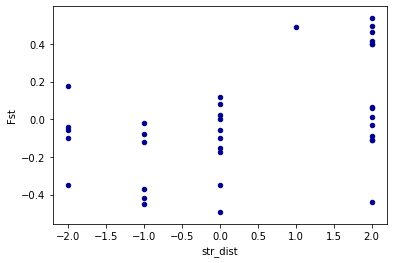

In [40]:
M_vals=table_vs_distance(table=pop_vals_site)
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))-3
# M_vals[M_vals['Fst']<0]=0
M_vals.plot.scatter(y='Fst',
                      x='str_dist',
                      c='DarkBlue')
# M_vals


,M,Fst,physical_dist,str_dist
"(R01L-10-T, R01L-12-T)",0.214648,0.699645,0.000000,-5.0
"(R01L-10-T, R02H-7-T)",-2.316330,-0.275280,0.011671,-2.0
"(R01L-10-T, R02H-8-T)",0.448127,0.527355,0.011671,-2.0
"(R01L-10-T, R02H-8-T_bis)",-2.276261,-0.281490,0.011671,-2.0
"(R01L-10-T, R02H-9-T)",3.532751,0.123985,0.011671,-2.0
...,...,...,...,...
"(R16L-2-T, R16L-4-T)",0.605539,0.452268,0.000000,-5.0
"(R16L-2-T, R16L-5-T)",2.265632,0.180791,0.000000,-5.0
"(R16L-3-T, R16L-4-T)",0.406873,0.551345,0.000000,-5.0
"(R16L-3-T, R16L-5-T)",1.136716,0.305490,0.000000,-5.0


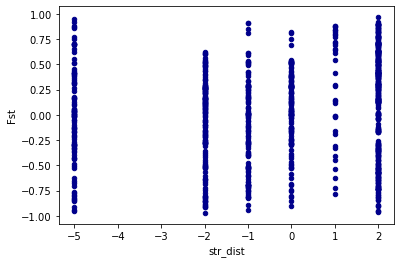

In [42]:
import seaborn as sns

M_vals=table_vs_distance(table=pop_vals_samples)
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))-3
# M_vals[M_vals['Fst']<0]=0
M_vals.plot.scatter(y='Fst',
                      x='str_dist',
                      c='DarkBlue')
M_vals

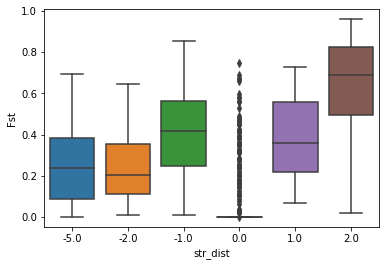

In [21]:
sns.boxplot(x="str_dist", y="Fst", data=M_vals)

[('R01L-10', 'R01L-12'), ('R01L-10', 'R02H-7'), ('R01L-10', 'R02H-8'), ('R01L-10', 'R02H-9'), ('R01L-10', 'R07B-1'), ('R01L-10', 'R07B-2'), ('R01L-10', 'R07B-3'), ('R01L-10', 'R08H-1'), ('R01L-10', 'R08H-2'), ('R01L-10', 'R08H-3'), ('R01L-10', 'R09L-2'), ('R01L-10', 'R09L-3'), ('R01L-10', 'R09L-4'), ('R01L-10', 'R13L-3'), ('R01L-10', 'R13L-4'), ('R01L-10', 'R13L-5'), ('R01L-10', 'R14B-2'), ('R01L-10', 'R14B-4'), ('R01L-10', 'R15H-1'), ('R01L-10', 'R15H-2'), ('R01L-10', 'R15H-3'), ('R01L-10', 'R15H-6'), ('R01L-10', 'R15H-7'), ('R01L-10', 'R16L-1'), ('R01L-10', 'R16L-2'), ('R01L-10', 'R16L-3'), ('R01L-10', 'R16L-4'), ('R01L-10', 'R16L-5'), ('R01L-12', 'R02H-7'), ('R01L-12', 'R02H-8'), ('R01L-12', 'R02H-9'), ('R01L-12', 'R07B-1'), ('R01L-12', 'R07B-2'), ('R01L-12', 'R07B-3'), ('R01L-12', 'R08H-1'), ('R01L-12', 'R08H-2'), ('R01L-12', 'R08H-3'), ('R01L-12', 'R09L-2'), ('R01L-12', 'R09L-3'), ('R01L-12', 'R09L-4'), ('R01L-12', 'R13L-3'), ('R01L-12', 'R13L-4'), ('R01L-12', 'R13L-5'), ('R01L-12

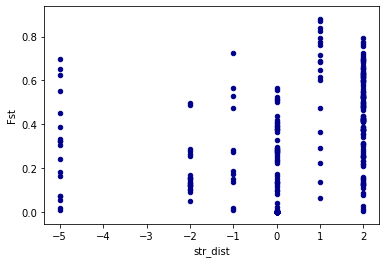

In [45]:
import seaborn as sns

M_vals=table_vs_distance(table=pop_vals_ind)
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))-3
M_vals[M_vals['Fst']<0]=0
M_vals.plot.scatter(y='Fst',
                      x='str_dist',
                      c='DarkBlue')
print([(s1,s2) for s1,s2 in M_vals.index])

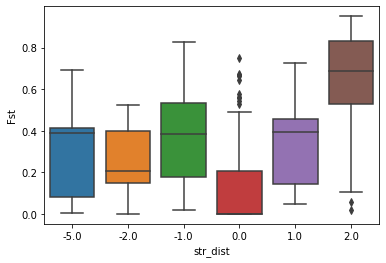

In [23]:
sns.boxplot(x="str_dist", y="Fst", data=M_vals)

In [32]:
M_vals=table_vs_distance(table=pop_vals_samples)
M_vals['s1']=[idx[0] for idx in M_vals.index.values]
M_vals['s2']=[idx[1] for idx in M_vals.index.values]

piv=M_vals.pivot(index='s1',columns='s2',values='Fst')
piv['R01L-10-T']=np.nan
piv=piv.append(pd.Series([],name='R16L-5-T'))
piv.sort_index(axis=0, inplace=True)
piv.sort_index(axis=1, inplace=True)
# piv[piv<0]=0
print(piv.columns.values)
print(piv.index.values)

for i in range(len(piv)):
    for j in range(i, len(piv)):
        piv.iloc[j][i] = piv.iloc[i][j]

piv.to_csv('../Runs_on_cluster/run2/arrays_in_whole_dataset_v6_pairwiseFst.csv',sep='\t')
piv

/Users/maeperez/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


['R01L-10-T' 'R01L-12-T' 'R02H-7-T' 'R02H-8-T' 'R02H-8-T_bis' 'R02H-9-T'
 'R07B-1-Ta' 'R07B-1-Tb' 'R07B-1-Tc' 'R07B-1-Td' 'R07B-2-Tb' 'R07B-2-Tc'
 'R07B-3-T' 'R08H-1-T' 'R08H-2-Ta' 'R08H-2-Tb' 'R08H-2-Tc' 'R08H-3-Ta'
 'R08H-3-Tb' 'R08H-3-Tc' 'R09L-2-Ta' 'R09L-2-Tb' 'R09L-2-Tc' 'R09L-3-T'
 'R09L-4-Ta' 'R09L-4-Tb' 'R09L-4-Tc' 'R13L-3-T' 'R13L-4-T' 'R13L-5-T'
 'R14B-2-T' 'R14B-4-T' 'R15H-1-T' 'R15H-2-T' 'R15H-2-T_bis' 'R15H-3-T'
 'R15H-3-T_old' 'R15H-6-T' 'R15H-7-T' 'R16L-1-T' 'R16L-2-T' 'R16L-3-T'
 'R16L-4-T' 'R16L-5-T']
['R01L-10-T' 'R01L-12-T' 'R02H-7-T' 'R02H-8-T' 'R02H-8-T_bis' 'R02H-9-T'
 'R07B-1-Ta' 'R07B-1-Tb' 'R07B-1-Tc' 'R07B-1-Td' 'R07B-2-Tb' 'R07B-2-Tc'
 'R07B-3-T' 'R08H-1-T' 'R08H-2-Ta' 'R08H-2-Tb' 'R08H-2-Tc' 'R08H-3-Ta'
 'R08H-3-Tb' 'R08H-3-Tc' 'R09L-2-Ta' 'R09L-2-Tb' 'R09L-2-Tc' 'R09L-3-T'
 'R09L-4-Ta' 'R09L-4-Tb' 'R09L-4-Tc' 'R13L-3-T' 'R13L-4-T' 'R13L-5-T'
 'R14B-2-T' 'R14B-4-T' 'R15H-1-T' 'R15H-2-T' 'R15H-2-T_bis' 'R15H-3-T'
 'R15H-3-T_old' 'R15H-6-T' 'R15H-7-T' 'R16L-1

s2,R01L-10-T,R01L-12-T,R02H-7-T,R02H-8-T,R02H-8-T_bis,R02H-9-T,R07B-1-Ta,R07B-1-Tb,R07B-1-Tc,R07B-1-Td,...,R15H-2-T_bis,R15H-3-T,R15H-3-T_old,R15H-6-T,R15H-7-T,R16L-1-T,R16L-2-T,R16L-3-T,R16L-4-T,R16L-5-T
s1,,,,,,,,,,,,,,,,,,,,,
R01L-10-T,NaN,-0.516257,-0.137376,-0.263623,-0.419646,-0.397148,0.075066,0.039928,0.301337,-0.101643,...,0.543200,0.582602,0.727293,0.334294,0.424892,0.393199,0.845443,0.679428,0.681328,0.853575
R01L-12-T,-0.516257,NaN,0.407802,0.292433,0.123329,0.149828,0.569262,0.544952,0.707526,0.437575,...,0.827422,0.844774,0.904091,0.725366,0.771842,0.755995,0.947952,0.885195,0.885958,0.950834
R02H-7-T,-0.137376,0.407802,NaN,-0.130990,-0.299538,-0.274763,0.210274,0.176337,0.421274,0.036239,...,0.633316,0.666625,0.786125,0.450960,0.531258,0.503384,0.880549,0.747075,0.748634,0.886947
R02H-8-T,-0.263623,0.292433,-0.130990,NaN,-0.175432,-0.149140,0.332117,0.300389,0.523382,0.166439,...,0.705758,0.733559,0.831493,0.549491,0.619161,0.595132,0.906931,0.799797,0.801068,0.911982
R02H-8-T_bis,-0.419646,0.123329,-0.299538,-0.175432,NaN,0.026998,0.479605,0.452001,0.640046,0.332172,...,0.784107,0.805351,0.878742,0.661186,0.716740,0.697719,0.933792,0.855231,0.856179,0.937433
R02H-9-T,-0.397148,0.149828,-0.274763,-0.149140,0.026998,NaN,0.458544,0.430253,0.623828,0.307936,...,0.773484,0.795653,0.872442,0.645714,0.703353,0.683598,0.930246,0.847809,0.848801,0.934075
R07B-1-Ta,0.075066,0.569262,0.210274,0.332117,0.479605,0.458544,NaN,-0.035244,0.231507,-0.175371,...,0.488033,0.530747,0.689891,0.265900,0.361350,0.327808,0.822582,0.636842,0.638940,0.831806
R07B-1-Tb,0.039928,0.544952,0.176337,0.300389,0.452001,0.430253,-0.035244,NaN,0.264592,-0.140999,...,0.514429,0.555599,0.707923,0.298348,0.391607,0.358906,0.833657,0.657332,0.659337,0.842355
R07B-1-Tc,0.301337,0.707526,0.421274,0.523382,0.640046,0.623828,0.231507,0.264592,NaN,-0.391004,...,0.289201,0.341159,0.545510,0.036649,0.141697,0.104209,0.730112,0.475429,0.478162,0.743468


[('R02H-8-T', 'R02H-8-T_bis'), ('R07B-1-Ta', 'R07B-1-Tb'), ('R07B-1-Ta', 'R07B-1-Tc'), ('R07B-1-Ta', 'R07B-1-Td'), ('R07B-1-Tb', 'R07B-1-Tc'), ('R07B-1-Tb', 'R07B-1-Td'), ('R07B-1-Tc', 'R07B-1-Td'), ('R07B-2-Tb', 'R07B-2-Tc'), ('R08H-2-Ta', 'R08H-2-Tb'), ('R08H-2-Ta', 'R08H-2-Tc'), ('R08H-2-Tb', 'R08H-2-Tc'), ('R08H-3-Ta', 'R08H-3-Tb'), ('R08H-3-Ta', 'R08H-3-Tc'), ('R08H-3-Tb', 'R08H-3-Tc'), ('R09L-2-Ta', 'R09L-2-Tb'), ('R09L-2-Ta', 'R09L-2-Tc'), ('R09L-2-Tb', 'R09L-2-Tc'), ('R09L-4-Ta', 'R09L-4-Tb'), ('R09L-4-Ta', 'R09L-4-Tc'), ('R09L-4-Tb', 'R09L-4-Tc'), ('R15H-2-T', 'R15H-2-T_bis'), ('R15H-3-T', 'R15H-3-T_old')]


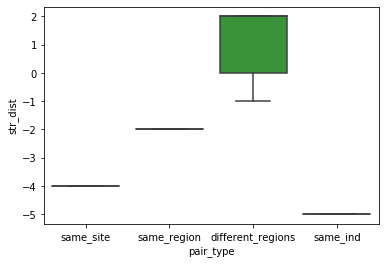

In [86]:
import seaborn as sns

M_vals=table_vs_distance(table=pop_vals_samples)
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))-3


M_vals['pair_type']='different_regions'

print([(s1,s2) for s1,s2 in M_vals.index if ('-'.join(s1.split('-')[:2])=='-'.join(s2.split('-')[:2]))])
same_ind=[(s1,s2) for s1,s2 in M_vals.index if ('-'.join(s1.split('-')[:2])=='-'.join(s2.split('-')[:2]))]
same_agg=[(s1,s2) for s1,s2 in M_vals.index if ('-'.join(s1.split('-')[:1])=='-'.join(s2.split('-')[:1])) and (s1,s2) not in same_ind]
same_region=[val for val in M_vals[M_vals.str_dist<-1].index.values if val not in set(same_ind+same_agg)]
M_vals.loc[same_ind,'pair_type']='same_ind'
M_vals.loc[same_agg,'pair_type']='same_site'
M_vals.loc[same_agg,'str_dist']=-4

M_vals.loc[same_region,'pair_type']='same_region'

sns.boxplot(x="pair_type", y="str_dist", data=M_vals)

# M_vals[M_vals['Fst']<0]=0
# M_vals.plot.scatter(y='Fst',
#                       x='str_dist',
#                       c='DarkBlue')

# sns.boxplot(x="str_dist", y="Fst", data=M_vals)


[('R02H-8-T', 'R02H-8-T_bis'), ('R07B-1-Ta', 'R07B-1-Tb'), ('R07B-1-Ta', 'R07B-1-Tc'), ('R07B-1-Ta', 'R07B-1-Td'), ('R07B-1-Tb', 'R07B-1-Tc'), ('R07B-1-Tb', 'R07B-1-Td'), ('R07B-1-Tc', 'R07B-1-Td'), ('R07B-2-Tb', 'R07B-2-Tc'), ('R08H-2-Ta', 'R08H-2-Tb'), ('R08H-2-Ta', 'R08H-2-Tc'), ('R08H-2-Tb', 'R08H-2-Tc'), ('R08H-3-Ta', 'R08H-3-Tb'), ('R08H-3-Ta', 'R08H-3-Tc'), ('R08H-3-Tb', 'R08H-3-Tc'), ('R09L-2-Ta', 'R09L-2-Tb'), ('R09L-2-Ta', 'R09L-2-Tc'), ('R09L-2-Tb', 'R09L-2-Tc'), ('R09L-4-Ta', 'R09L-4-Tb'), ('R09L-4-Ta', 'R09L-4-Tc'), ('R09L-4-Tb', 'R09L-4-Tc'), ('R15H-2-T', 'R15H-2-T_bis'), ('R15H-3-T', 'R15H-3-T_old')]


,M,Fst,physical_dist,str_dist,pair_type
"(R01L-10-T, R01L-12-T)",1.702625,0.227002,0.000000,-4.0,same_site
"(R01L-10-T, R02H-7-T)",0.000000,0.000000,0.000000,0.0,0
"(R01L-10-T, R02H-8-T)",2.980740,0.143648,0.011671,-2.0,same_region
"(R01L-10-T, R02H-8-T_bis)",0.000000,0.000000,0.000000,0.0,0
"(R01L-10-T, R02H-9-T)",7.920857,0.059376,0.011671,-2.0,same_region
...,...,...,...,...,...
"(R16L-2-T, R16L-4-T)",1.788471,0.218486,0.000000,-4.0,same_site
"(R16L-2-T, R16L-5-T)",0.451589,0.525437,0.000000,-4.0,same_site
"(R16L-3-T, R16L-4-T)",1.676967,0.229677,0.000000,-4.0,same_site
"(R16L-3-T, R16L-5-T)",0.436481,0.533914,0.000000,-4.0,same_site


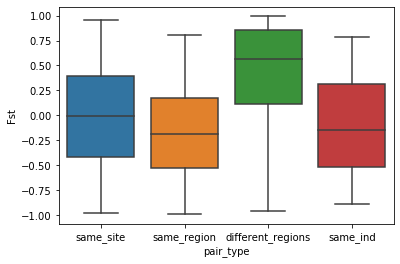

In [115]:
pop_vals_binary=pop_vals_samples.copy()
pop_vals_binary[pop_vals_binary.iloc[:,:123]>1]=1
pop_vals_binary

M_vals=table_vs_distance(table=pop_vals_binary)
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))-3
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))-3


M_vals['pair_type']='different_regions'

print([(s1,s2) for s1,s2 in M_vals.index if ('-'.join(s1.split('-')[:2])=='-'.join(s2.split('-')[:2]))])
same_ind=[(s1,s2) for s1,s2 in M_vals.index if ('-'.join(s1.split('-')[:2])=='-'.join(s2.split('-')[:2]))]
same_agg=[(s1,s2) for s1,s2 in M_vals.index if ('-'.join(s1.split('-')[:1])=='-'.join(s2.split('-')[:1])) and (s1,s2) not in same_ind]
same_region=[val for val in M_vals[M_vals.str_dist<-1].index.values if val not in set(same_ind+same_agg)]
M_vals.loc[same_ind,'pair_type']='same_ind'
M_vals.loc[same_agg,'pair_type']='same_site'
M_vals.loc[same_agg,'str_dist']=-4

M_vals.loc[same_region,'pair_type']='same_region'

# sns.boxplot(x="pair_type", y="str_dist", data=M_vals)
sns.boxplot(x="pair_type", y="Fst", data=M_vals)


M_vals[M_vals['Fst']<0]=0
# M_vals.plot.scatter(y='Fst',
#                       x='str_dist',
#                       c='DarkBlue')

# sns.boxplot(x="str_dist", y="Fst", data=M_vals)

M_vals